





---


# **Empresas más grandes del mundo 2024**


---


---




# Introducción

*Objetivo general:* Analizar las empresas más grandes del mundo en 2024

Fuente: https://economipedia.com/ranking/empresas-mas-grandes-del-mundo-2024.html

Método: Aplicación de técnicas de procesamiento de lenguaje natural (NLP) como preprocesamiento, tokenización, eliminación de stopwords, vectorización de texto, análisis de frecuencias y visualización de datos textuales.



# **Preparando el texto narrativo (el cuerpo del artículo)**

In [1]:
!python -m spacy download es_core_news_sm -q
import requests
from bs4 import BeautifulSoup
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import spacy

# Descargas de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Carga de modelo spaCy en español
nlp = spacy.load("es_core_news_sm") # Load the Spanish model after downloading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 17.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# ----------------------------------------------------
# Paso 1: Web Scraping – Extraer texto narrativo
# ----------------------------------------------------

url = "https://economipedia.com/ranking/empresas-mas-grandes-del-mundo-2024.html"  # URL del artículo
headers = {"User-Agent": "Mozilla/5.0"}  # Cabecera para evitar bloqueo por bots

response = requests.get(url, headers=headers)  # Hacemos la solicitud HTTP
soup = BeautifulSoup(response.content, "html.parser")  # Analizamos el HTML con BeautifulSoup

contenido = soup.find("div", class_=["post-body", "entry-content"])  # Buscamos el div que contiene el texto del artículo

if contenido:
    full_text = contenido.get_text(separator="\n", strip=True)  # Extraemos el texto completo con saltos de línea
    corte = full_text.lower().find("top 100 mundial")  # Buscamos el corte antes de que empiece la tabla
    narrative_text = full_text[:corte].strip() if corte != -1 else full_text  # Cortamos el texto solo al cuerpo narrativo
    print("Texto narrativo extraído:")
    print(narrative_text)  # Mostramos el texto extraído
else:
    print("No se encontró el contenido principal.")  # Si no se encuentra el contenido
    narrative_text = ""  # Variable vacía por si falla

Texto narrativo extraído:
Microsoft vuelve a la cima mundial tras subir más de un 50% en bolsa en 12 meses.
Ha sido la primera empresa en superar la valoración de tres billones de dólares (3 trillion americanos).
Para que te hagas una idea de cuánto es ese dineral, es equivalente al
PIB
de Francia.
Apple vs Microsoft: 2 pesos pesados
Apple, el gigante de la manzana se queda rezagado a la segunda plaza, a pesar de
su reciente y prometedor lanzamiento de gafas
.
Microsoft y Apple llevan ya 10 años en este duelo apasionante por el primer puesto. No sé cuál será el año que viene, pero probablemente sea una de las dos. ¿Tu qué crees?
Para ser exactos solo ha habido una excepción en los últimos 10 años .
Quizá te estés preguntando por la «pequeña» Aramco, la única empresa en 10 años que se ha entrometido en este duelo. Salió a bolsa coronándose como la empresa más grande del mundo hace 4 años, pero en menos de 1 año Apple le quitó las pegatinas al adelantar.
Las siguientes empresas en la lis

In [26]:
# ----------------------------------------------------
# Paso 2: Preprocesamiento de texto
# ----------------------------------------------------

def clean_text(text):
    text = text.lower()  # Pasamos a minúsculas
    text = re.sub(r'\[.*?\]', ' ', text)  # Eliminamos cualquier contenido entre corchetes
    text = re.sub(r'[¿%]', ' ', text)  # Quitamos caracteres especiales como ¿ o %
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)  # Eliminamos signos de puntuación
    #mantengo los numeros
    text = re.sub(r'\s+', ' ', text).strip()  # Reemplazamos espacios múltiples por uno solo
    return text

cleaned_text = clean_text(narrative_text)  # Aplicamos limpieza al texto narrativo
print("Texto limpio:", cleaned_text[:500])  # Mostramos los primeros 500 caracteres del texto limpio

Texto limpio: microsoft vuelve a la cima mundial tras subir más de un 50 en bolsa en 12 meses ha sido la primera empresa en superar la valoración de tres billones de dólares 3 trillion americanos para que te hagas una idea de cuánto es ese dineral es equivalente al pib de francia apple vs microsoft 2 pesos pesados apple el gigante de la manzana se queda rezagado a la segunda plaza a pesar de su reciente y prometedor lanzamiento de gafas microsoft y apple llevan ya 10 años en este duelo apasionante por el prim


In [43]:
# ----------------------------------------------------
# Paso 3: Lematización con spaCy# ----------------------------------------------------

doc = nlp(cleaned_text)  # Procesamos el texto limpio con spaCy (tokeniza, lema, y más)

# Lista de lemas, excluyendo stopwords, signos y números
stop_words = set(stopwords.words('spanish'))  # Obtenemos las palabras vacías en español
lemmas = [
    token.lemma_.lower()  # Convertimos el lema a minúscula
    for token in doc
    if token.is_alpha and token.lemma_.lower() not in stop_words  # Solo palabras y que no sean stopwords
]

print("Primeros lemas filtrados:", lemmas[:30])  # Mostramos una muestra de los lemas

Primeros lemas filtrados: ['microsoft', 'vuelve', 'cima', 'mundial', 'tras', 'subir', 'bolsa', 'mes', 'haber', 'ser', 'primero', 'empresa', 'superar', 'valoración', 'tres', 'billón', 'dólares', 'trillion', 'americano', 'hagar', 'idea', 'cuánto', 'ser', 'dineral', 'ser', 'equivalente', 'pib', 'francia', 'apple', 'vs']


In [28]:
# ----------------------------------------------------
# Paso 4: Vectorización usando texto lematizado
# ----------------------------------------------------

lemmatized_text = " ".join(lemmas)  # Unimos los lemas en un solo string

vectorizer = CountVectorizer()  # Creamos el vectorizador de texto
X = vectorizer.fit_transform([lemmatized_text])  # Ajustamos y transformamos el texto en una matriz de conteo

words = vectorizer.get_feature_names_out()  # Obtenemos las palabras
counts = X.toarray().flatten()  # Aplanamos el array de frecuencias

df_vect = pd.DataFrame({'Palabra': words, 'Frecuencia': counts})  # Creamos DataFrame con las palabras y sus frecuencias
df_vect = df_vect.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)  # Ordenamos por frecuencia

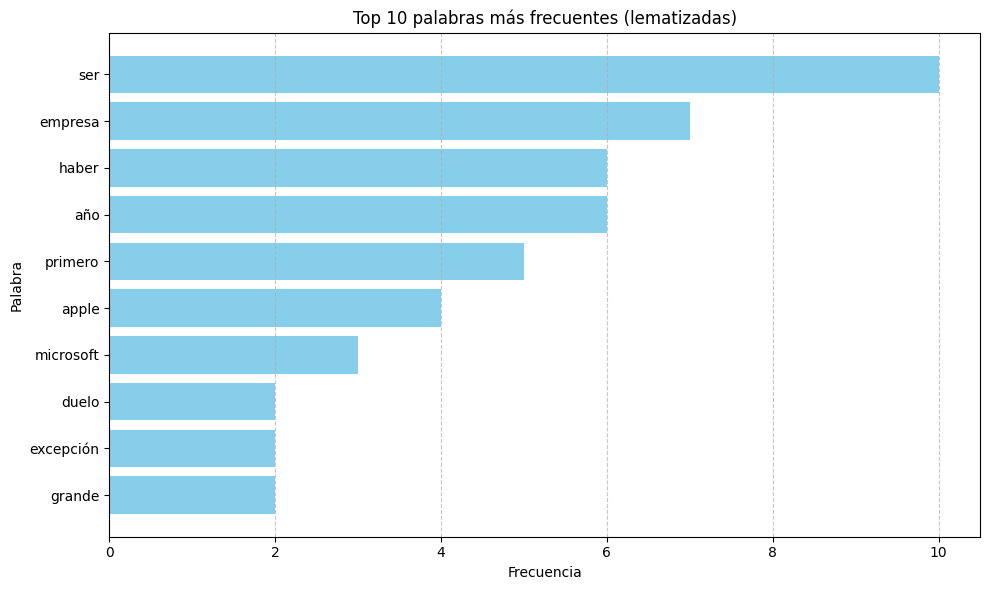

In [6]:
# ----------------------------------------------------
# Paso 5: Visualización - Gráfico de barras horizontal
# ----------------------------------------------------

top_words = df_vect.head(10)  # Seleccionamos las 10 palabras más frecuentes

plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.barh(top_words['Palabra'][::-1], top_words['Frecuencia'][::-1], color='skyblue')  # Gráfico de barras
plt.xlabel('Frecuencia')  # Etiqueta eje x
plt.ylabel('Palabra')  # Etiqueta eje y
plt.title('Top 10 palabras más frecuentes (lematizadas)')  # Título
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Cuadrícula suave en eje x
plt.tight_layout()  # Ajuste automático de márgenes
plt.show()  # Mostramos el gráfico

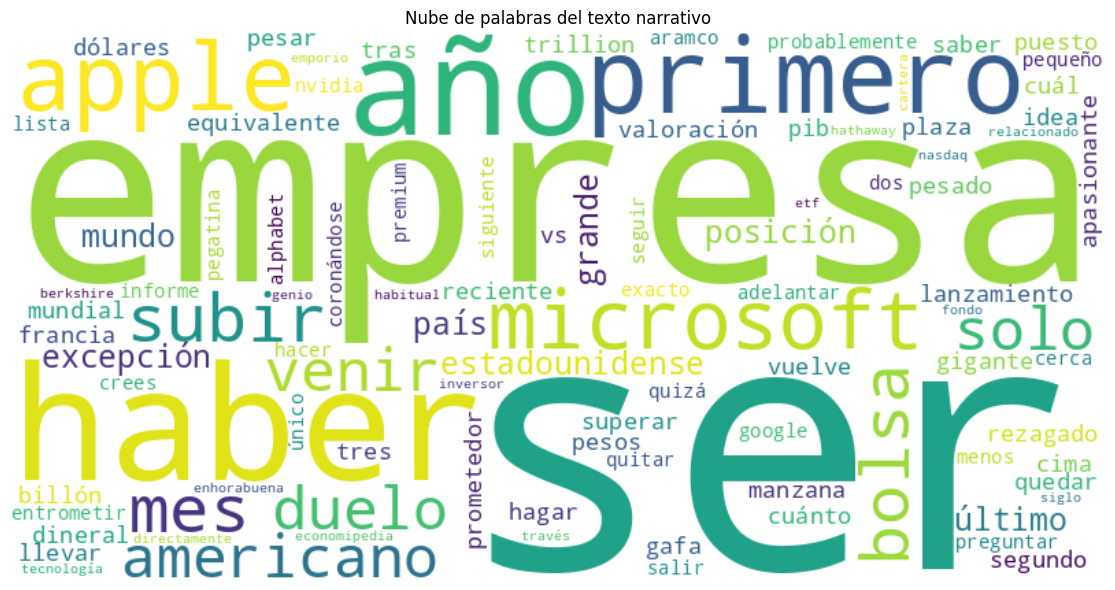

In [7]:
# ----------------------------------------------------
# Paso 6: Visualización - WordCloud (nube de palabras)
# ----------------------------------------------------

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # Fondo blanco
    colormap='viridis',  # Paleta de colores
    max_words=100  # Máximo 100 palabras
).generate(lemmatized_text)  # Generamos la nube con el texto lematizado

plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Mostramos la imagen
plt.axis("off")  # Ocultamos los ejes
plt.title("Nube de palabras del texto narrativo")  # Título
plt.tight_layout()  # Ajuste automático
plt.show()  # Mostramos la nube



---

# **Preparando la tabla con las 100 empresas más grandes del mundo**



---



---



In [39]:
#----------------------------------------------------
# Paso 1: Extracción de la tabla - Leer la tabla HTML de la página
#----------------------------------------------------

# Esto devuelve una lista de DataFrames (una por cada tabla encontrada)
tables = pd.read_html(url)

# Guardamos la tabla en una variable
df_empresas = tables[0]

# Eliminamos filas con valores basura en columnas clave (como 'País' o 'Sector')
df_empresas = df_empresas[~df_empresas['País'].astype(str).str.contains('fuente|nota|datos', case=False, na=False)]
df_empresas = df_empresas[~df_empresas['Sector'].astype(str).str.contains('fuente|nota|datos', case=False, na=False)]

# Eliminamos la columna de enumeración si existe
for col in df_empresas.columns:
    if col.lower().startswith('n') or 'puesto' in col.lower():
        df_empresas.drop(columns=col, inplace=True)

# Limpiamos la columna 'Cap. Bursátil' para convertir a tipo numérico
df_empresas['Cap. Bursátil'] = df_empresas['Cap. Bursátil'].astype(str)  # Aseguramos que sea tipo string

# Reemplazamos las comas por puntos para convertir correctamente
df_empresas['Cap. Bursátil'] = df_empresas['Cap. Bursátil'].str.replace(',', '.')

# Convertimos los valores a tipo numérico (float), asegurándonos de manejar posibles errores
df_empresas['Cap. Bursátil'] = pd.to_numeric(df_empresas['Cap. Bursátil'], errors='coerce')

#----------------------------------------------------
# Mostramos la tabla con un formato bonito y limpio
df_empresas.head(10).style \
    .set_caption("Empresas más grandes del mundo (2024)") \
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#2c3e50'),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center')]},
        {'selector': 'td',
         'props': [('text-align', 'center'),
                   ('border', '1px solid #ccc')]}
    ]) \
    .format({'Cap. Bursátil': '{:,.0f}'})  # Formato con separador de miles
#----------------------------------------------------

,Empresa,País,Sector,Cap. Bursátil
0,Microsoft Corp,Estados Unidos,Software,"308,556"
1,Apple Inc,Estados Unidos,Hardware,"288,995"
2,Aramco,Arabia Saudita,"Petróleo, Gas y otros combustibles","199,392"
3,Alphabet,Estados Unidos,Medios Interactivos y Servicios,"184,157"
4,Nvidia,Estados Unidos,Semiconductores,"178,453"
5,Amazon.Com,Estados Unidos,Comercio Minorista General,"179,016"
6,Meta Platforms,Estados Unidos,Medios Interactivos y Servicios,"119,584"
7,Berkshire Hathaway,Estados Unidos,Servicios Financieros,"86,174"
8,Eli Lilly & Co,Estados Unidos,Farmacéuticos,"69,989"
9,Tesla Inc,Estados Unidos,Automóviles,"59,915"


In [12]:
# Número de sectores único
num_sectores = df_empresas["Sector"].nunique()

# Número de países únicos
num_paises = df_empresas['País'].nunique()

print(f"Total de sectores únicos: {num_sectores}")
print(f"Total de países únicos: {num_paises}")


Total de sectores únicos: 36
Total de países únicos: 19




---

# **Analizando las empresas más grandes del mundo en 2024**



---


---



# **Entidades y eventos clave**

In [13]:
#----------------------------------------------------
# Análisis de empresas más frecuentes del texto
#----------------------------------------------------

# Extraemos las entidades nombradas de tipo 'ORG' (organizaciones) del texto procesado
empresas = [ent.text.lower().strip() for ent in doc.ents if ent.label_ == "ORG"]

# Importamos la clase Counter para contar la frecuencia de las empresas
from collections import Counter

# Contamos las empresas y mostramos las 10 más comunes
conteo_empresas = Counter(empresas)
print("Empresas más frecuentes:", conteo_empresas.most_common(10))


Empresas más frecuentes: [('apple', 4), ('microsoft', 3), ('alphabet google', 1), ('nvidia', 1)]


In [32]:
from spacy import displacy

# Mostrar entidades nombradas en el texto con colores según su tipo (ORG, DATE, GPE, etc.)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 200})


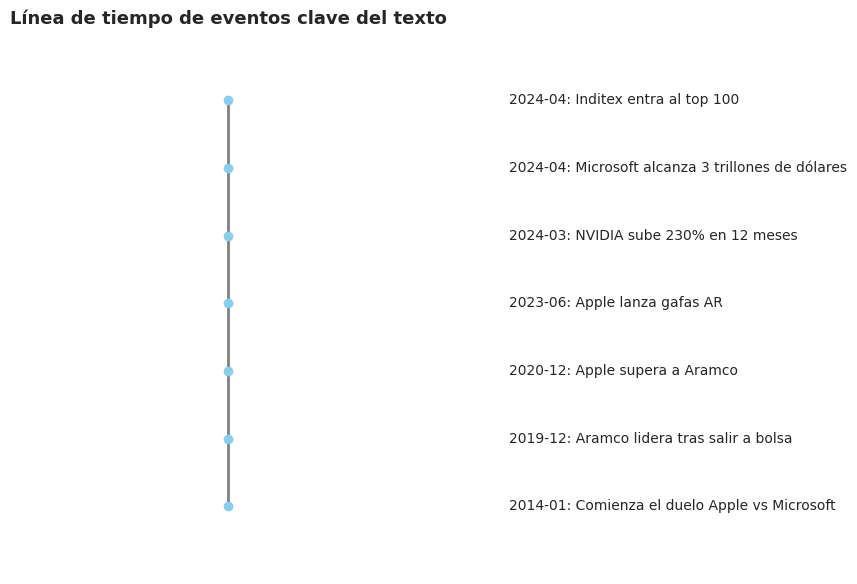

In [35]:
#----------------------------------------------------
#     gráfico de línea de tiempo
#----------------------------------------------------

# Fechas estimadas (formato Año-Mes)
fechas = [
    "2014-01",  # Inicio del duelo Apple vs Microsoft
    "2019-12",  # Aramco sale a bolsa y lidera
    "2020-12",  # Apple supera a Aramco
    "2023-06",  # Apple lanza gafas
    "2024-03",  # NVIDIA +230%
    "2024-04",  # Microsoft supera 3 trillones
    "2024-04"   # Inditex entra al top 100
]

# Eventos correspondientes
eventos = [
    "Comienza el duelo Apple vs Microsoft",
    "Aramco lidera tras salir a bolsa",
    "Apple supera a Aramco",
    "Apple lanza gafas AR",
    "NVIDIA sube 230% en 12 meses",
    "Microsoft alcanza 3 trillones de dólares",
    "Inditex entra al top 100"
]

# Crear gráfico de línea de tiempo
fig, ax = plt.subplots(figsize=(10, 6))

# Línea vertical
ax.plot([0, 0], [0, len(fechas)-1], color='gray', linewidth=2)

# Agregar eventos
for i, (fecha, evento) in enumerate(zip(fechas, eventos)):
    ax.plot(0, i, 'o', color='skyblue')
    ax.text(0.1, i, f"{fecha}: {evento}", verticalalignment='center', fontsize=10)

# Estética
ax.set_ylim(-1, len(fechas))
ax.axis('off')
plt.title("Línea de tiempo de eventos clave del texto", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

In [40]:
df_empresas.tail(5).style \
    .set_caption("Empresas en las últimas posiciones del top 100 (2024)") \
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#2c3e50'),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center')]},
        {'selector': 'td',
         'props': [('text-align', 'center'),
                   ('border', '1px solid #ccc')]}
    ]) \
    .format({'Cap. Bursátil': '{:,.0f}'})

,Empresa,País,Sector,Cap. Bursátil
95,Royal Bank Of Ca,Canadá,Bancos,"13,693"
96,Intuitive Surgic,Estados Unidos,Equipos y Suministros para la Salud,"13,463"
97,S&P Global Inc,Estados Unidos,Mercados de Capitales,"13,492"
98,Booking Holdings,Estados Unidos,"Hoteles, Restaurantes y Ocio","13,224"
99,Inditex,España,Comercio Minorista,"13,156"




---



---


# ***Análisis de la tabla***

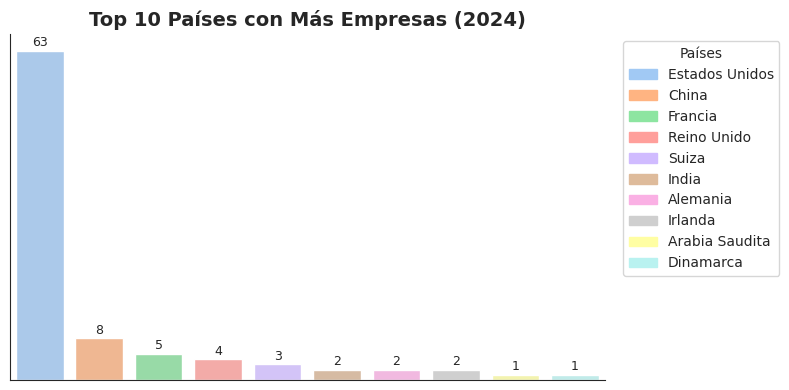

In [15]:
#                        ----------------------------------------------------
#                                       Análisis de la tabla
#                        ----------------------------------------------------

# Ocultamos las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings("ignore")

# Importamos librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Establecemos un estilo limpio para los gráficos
sns.set_style("white")

# Calculamos cuántas empresas hay por país
empresas_por_pais = df_empresas['País'].value_counts()

# Seleccionamos los 10 países con más empresas
top_paises = empresas_por_pais.head(10)

# Usamos una paleta de colores más suave (pastel) para el gráfico
colores = sns.color_palette("pastel", n_colors=10)

# Creamos un diccionario de países y colores para la leyenda
leyenda = dict(zip(top_paises.index, colores))

# Creamos un gráfico pequeño para visualizar las 10 principales
plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    x=list(range(len(top_paises))),  # Usamos índices para ocultar nombres
    y=top_paises.values,
    palette=colores
)

# Añadimos etiquetas encima de cada barra
for i, value in enumerate(top_paises.values):
    plt.text(i, value + 0.3, str(value), ha='center', va='bottom', fontsize=9)

# Quitamos las etiquetas de los ejes
barplot.set_xticks([])
barplot.set_yticks([])
barplot.set_xlabel("")
barplot.set_ylabel("")

# Título del gráfico
plt.title('Top 10 Países con Más Empresas (2024)', fontsize=14, weight='bold')

# Eliminamos los bordes del gráfico
sns.despine()

# Creamos una leyenda al lado con los colores correspondientes a cada país
leyenda_paises = [Patch(color=leyenda[pais], label=pais) for pais in top_paises.index]
plt.legend(handles=leyenda_paises, title="Países", bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajustamos el diseño y mostramos el gráfico
plt.tight_layout()
plt.show()




*   Más de la mitad del poder empresarial mundial está concentrado en EE.UU.
*   Hay una dominancia desproporcionada respecto a otros países.

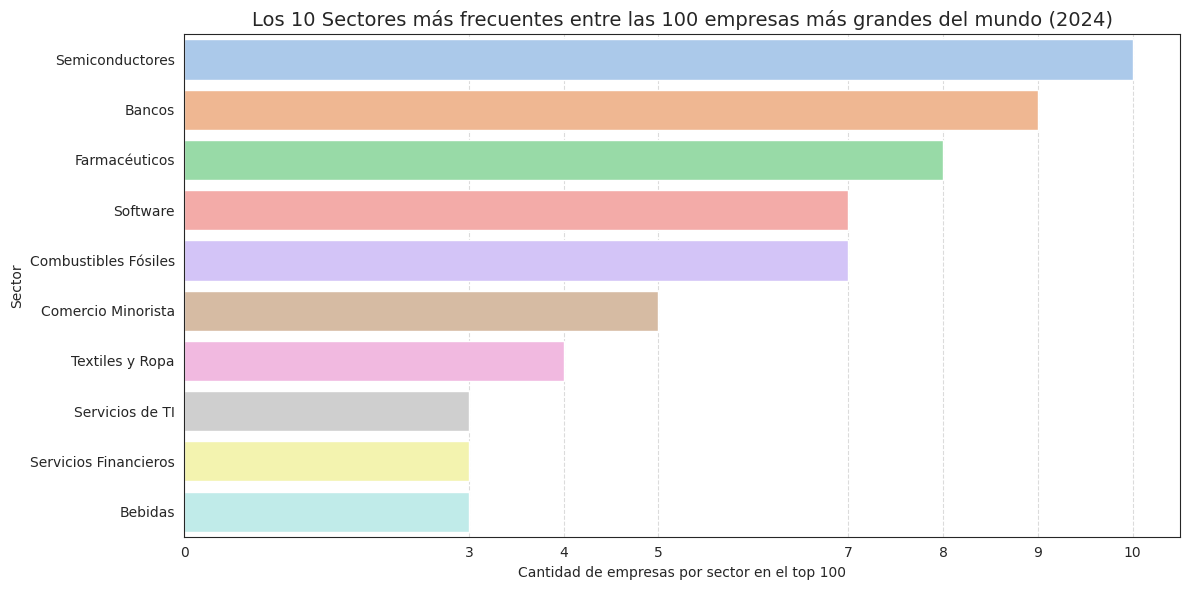

In [16]:
#----------------------------------------------------
# Análisis de sectores más comunes
#----------------------------------------------------

# Resumimos los nombres de sectores para agruparlos
sectores_resumidos = {
    'Software': 'Software',
    'Hardware': 'Hardware',
    'Petróleo, Gas y otros combustibles': 'Combustibles Fósiles',
    'Medios Interactivos y Servicios': 'Medios Interactivos',
    'Semiconductores': 'Semiconductores',
    'Comercio Minorista General': 'Comercio Minorista',
    'Servicios Financieros': 'Servicios Financieros',
    'Farmacéuticos': 'Farmacéuticos',
    'Textiles, ropa y bienes de Lujo': 'Textiles y Ropa'
}

# Contamos las ocurrencias de cada sector en el DataFrame y aplicamos los nombres resumidos
sectores_contados = df_empresas['Sector'].replace(sectores_resumidos)
sectores_comunes = sectores_contados.value_counts().head(10)

# Creamos un gráfico de barras para los sectores más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=sectores_comunes.values, y=sectores_comunes.index, palette='pastel')

# Título y etiquetas
plt.title('Los 10 Sectores más frecuentes entre las 100 empresas más grandes del mundo (2024)', fontsize=14)
plt.xlabel('Cantidad de empresas por sector en el top 100')

# Personalizamos los ticks del eje X
plt.xticks([0, 3, 4, 5, 7, 8, 9, 10])

# Añadimos una cuadrícula y ajustamos el formato
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***Los semiconductores son materiales y productos que están en el corazón de la tecnología moderna. Se usan para fabricar chips electrónicos, que son como el "cerebro" de cualquier dispositivo electrónico.***

 + La tecnología de semiconductores es el sector más fuerte entre las gigantes globales.

 + Banca y salud (farmacéuticos) también tienen una gran presencia.

 + Sectores tradicionales como energía (combustibles fósiles) y retail siguen siendo importantes.

 + Hay muchos menos gigantes en textiles, bebidas o servicios de TI, lo que muestra que el poder corporativo está concentrado principalmente en tecnología, finanzas y salud.

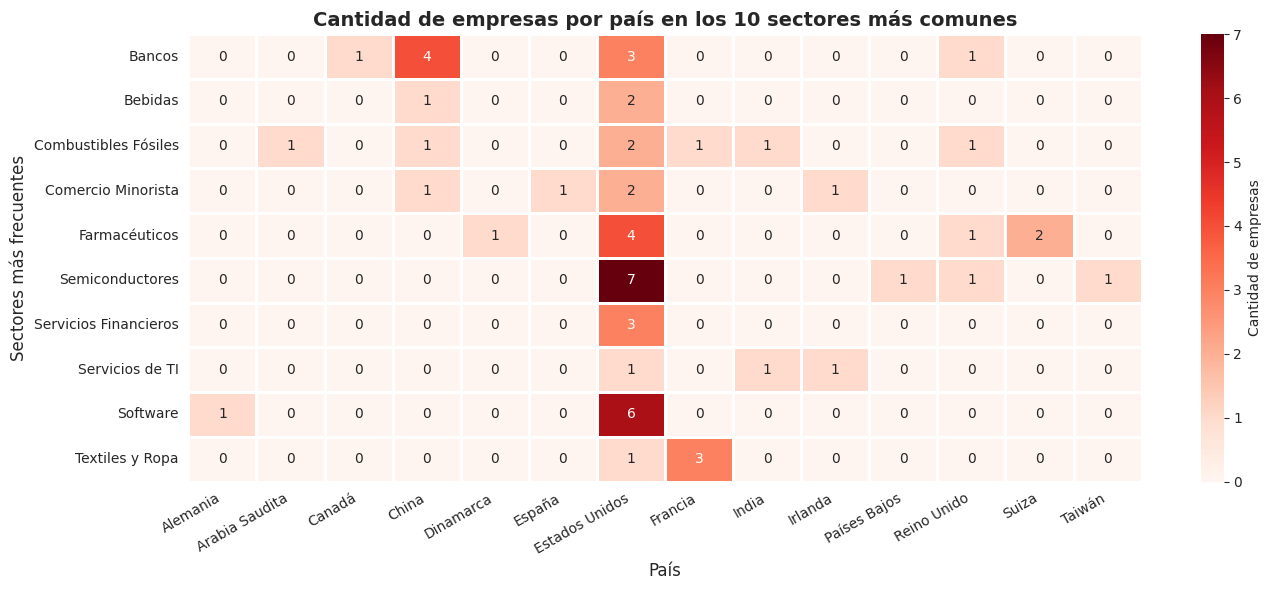

In [17]:
#----------------------------------------------------
# Análisis por sector más frecuente
#----------------------------------------------------

# Obtenemos los 10 sectores más comunes
top_sectores = df_empresas['Sector'].replace(sectores_resumidos).value_counts().head(10).index

# Filtramos el DataFrame con los sectores más comunes
df_top = df_empresas[df_empresas['Sector'].replace(sectores_resumidos).isin(top_sectores)].copy()

# Creamos una columna para el sector resumido
df_top['Sector Resumido'] = df_top['Sector'].replace(sectores_resumidos)

# Creamos una tabla de frecuencia por sector y país
tabla_frecuencia_top = df_top.pivot_table(
    index='Sector Resumido',
    columns='País',
    values='Empresa',
    aggfunc='count',
    fill_value=0
)

# Graficamos un mapa de calor con la frecuencia de empresas por país y sector
plt.figure(figsize=(14, 6))

sns.heatmap(
    tabla_frecuencia_top,
    annot=True,
    fmt='d',
    cmap="Reds",  # Usamos un mapa de colores en tonos rojos
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de empresas'},
    annot_kws={"size": 10}
)

# Título y etiquetas
plt.title('Cantidad de empresas por país en los 10 sectores más comunes', fontsize=14, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Sectores más frecuentes', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajustamos el diseño
plt.tight_layout()
plt.show()

+ Estados Unidos está en casi todos los sectores, mostrando una economía muy diversificada.

+ China también está presente en varios sectores, especialmente financieros y consumo.

+ Otros países como Francia, Reino Unido o Suiza tienen empresas en sectores muy específicos.

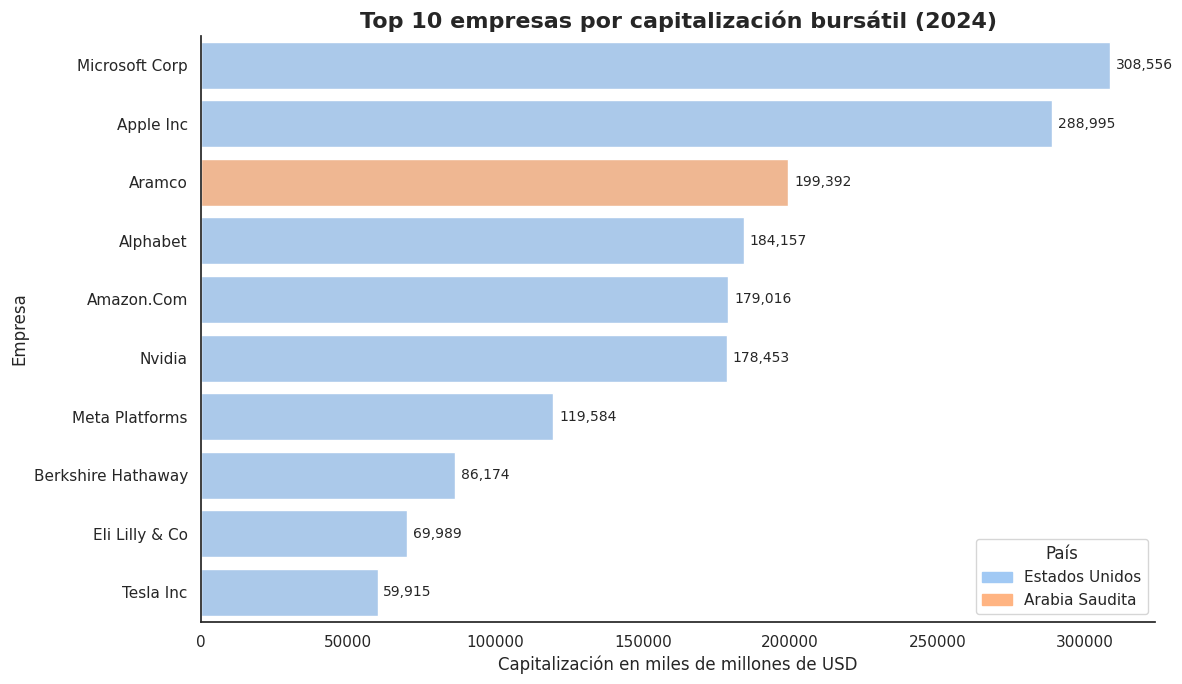

In [18]:
#----------------------------------------------------
# Análisis de capitalización bursátil
#----------------------------------------------------

# Ordenamos el DataFrame por capitalización bursátil y seleccionamos las 10 empresas más grandes
df_top10 = df_empresas.sort_values(by='Cap. Bursátil', ascending=False).head(10)

# Creamos una etiqueta para las empresas
df_top10['Empresa_Label'] = df_top10['Empresa']

# Establecemos un estilo limpio para los gráficos
sns.set(style="white")

# Creamos una paleta de colores por país
paises_unicos = df_top10['País'].unique()
palette = sns.color_palette("pastel", len(paises_unicos))  # Paleta pastel
colores_por_pais = dict(zip(paises_unicos, palette))
colores = df_top10['País'].map(colores_por_pais)

# Graficamos las 10 empresas más grandes por capitalización bursátil
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x='Cap. Bursátil',
    y='Empresa_Label',
    data=df_top10,
    palette=colores.tolist()
)

# Títulos y etiquetas
plt.title('Top 10 empresas por capitalización bursátil (2024)', fontsize=16, weight='bold')
plt.xlabel('Capitalización en miles de millones de USD', fontsize=12)
plt.ylabel('Empresa', fontsize=12)

# Añadimos etiquetas de valores a las barras
for index, value in enumerate(df_top10['Cap. Bursátil']):
    plt.text(value + 2000, index, f'{value:,.0f}', va='center', fontsize=10)

# Leyenda personalizada por país
from matplotlib.patches import Patch
leyenda = [Patch(color=colores_por_pais[pais], label=pais) for pais in paises_unicos]
plt.legend(handles=leyenda, title='País', loc='lower right')

# Ajustamos los márgenes y mostramos el gráfico
plt.tight_layout()
sns.despine()
plt.show()


*capitalización bursátil: Mostrando cuáles son las empresas con más valor de mercado.*



*   Microsoft es la empresa más valiosa, con un valor de 308.556 mil millones de USD.
* 9 empresas son de Estados Unidos.

+ Solo 1 empresa, Aramco, es de Arabia Saudita.
+ La mayoría de las empresas en esta lista son de tecnología
+ Una empresa de energía: Aramco (petróleo).


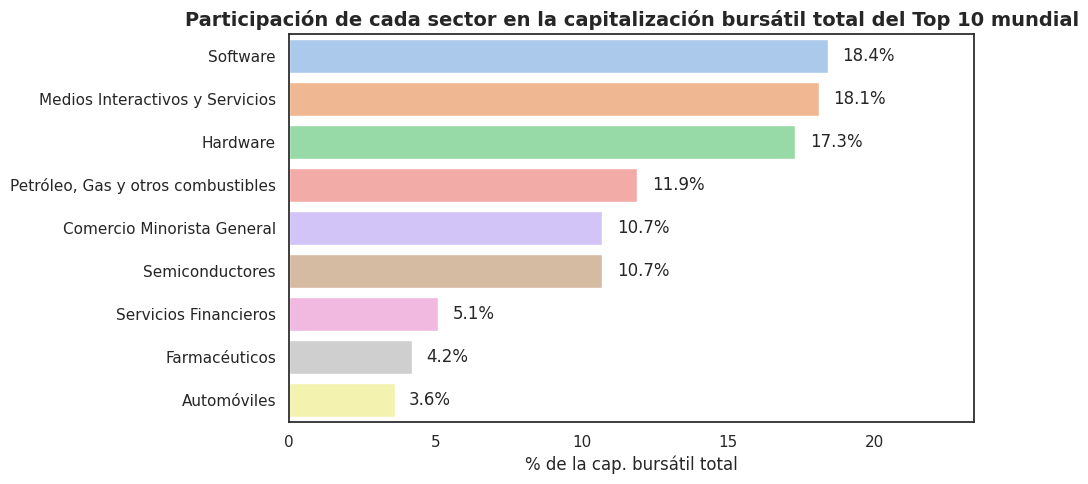

In [19]:
#----------------------------------------------------
# Análisis de participación de cada sector
#----------------------------------------------------

# Calculamos la participación de cada sector en la capitalización bursátil total
total = df_top10['Cap. Bursátil'].sum()
pct_por_sector = (
    df_top10.groupby('Sector')['Cap. Bursátil']
    .sum()
    .sort_values(ascending=False)
    .pipe(lambda s: (s/total*100).round(1))
)

# Graficamos la participación de cada sector
plt.figure(figsize=(10,5))
bar = sns.barplot(
    x=pct_por_sector.values,
    y=pct_por_sector.index,
    palette=sns.color_palette("pastel", len(pct_por_sector))
)

# Anotamos los porcentajes en las barras
for i, valor in enumerate(pct_por_sector.values):
    plt.text(valor + 0.5, i, f'{valor:.1f}%', va='center')

# Título y etiquetas
plt.title('Participación de cada sector en la capitalización bursátil total del Top 10 mundial', fontsize=14, weight='bold')
plt.xlabel('% de la cap. bursátil total')
plt.ylabel('')

# Ajustamos los márgenes y mostramos el gráfico
plt.xlim(0, pct_por_sector.max() + 5)
plt.tight_layout()
plt.show()



+ Las empresas de tecnología (software, redes, celulares, chips) son las que tienen los pedazos más grandes. Son las que más valen dentro del top 10 mundial.

+ Las empresas de petróleo, comercio o autos también valen mucho, pero no tanto como las tecnológicas.

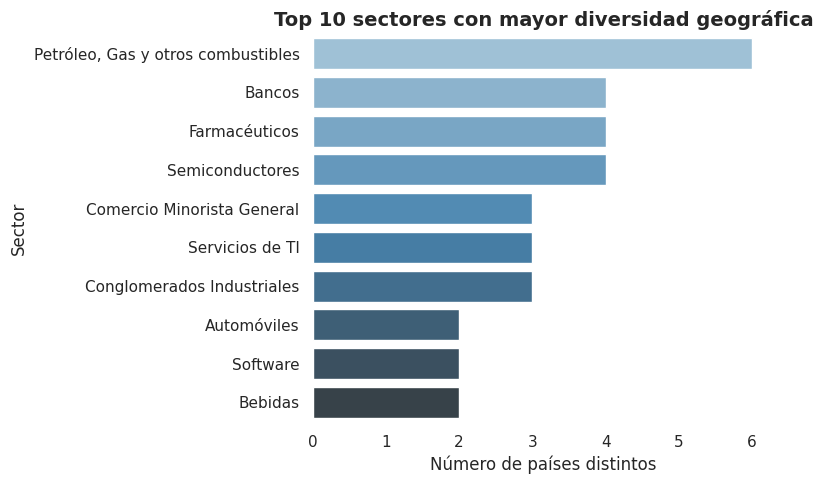

In [20]:
#----------------------------------------------------
# Análisis de diversidad geográfica por sector
#----------------------------------------------------

# Calculamos el número de países distintos por sector
diversidad = (
    df_empresas
    .groupby('Sector')['País']
    .nunique()
    .sort_values(ascending=False)
    .head(10)  # Solo top 10
)

# Graficamos un gráfico de barras con la diversidad geográfica por sector
plt.figure(figsize=(8, 5))
sns.barplot(
    x=diversidad.values,
    y=diversidad.index,
    palette='Blues_d'  # Una paleta uniforme para la diversidad
)

# Título y etiquetas
plt.title('Top 10 sectores con mayor diversidad geográfica', fontsize=14, weight='bold')
plt.xlabel('Número de países distintos', fontsize=12)
plt.ylabel('Sector', fontsize=12)

# Quitamos bordes innecesarios
sns.despine(left=True, bottom=True)

# Ajustamos el diseño y mostramos el gráfico
plt.tight_layout()
plt.show()

In [21]:
#----------------------------------------------------
# Análisis de empresa más valiosa por sector
#----------------------------------------------------

# Ordenar por capitalización bursátil de mayor a menor
df_ordenado = df_empresas.sort_values('Cap. Bursátil', ascending=False)

# Agrupar por sector y tomar la empresa con mayor cap. bursátil
empresa_mas_valiosa_por_sector = df_ordenado.groupby('Sector').first()[['Empresa', 'País', 'Cap. Bursátil']]

# Mostrar el resultado
display(empresa_mas_valiosa_por_sector)

,Empresa,País,Cap. Bursátil
Sector,,,
Automóviles,Tesla Inc,Estados Unidos,59915
Bancos,JP Morgan Chase,Estados Unidos,50821
Bebidas,Kweichow Mouta,China,29791
Biotecnología,Abbvie Inc,Estados Unidos,30556
Ciencias de la Vida,Thermo Fisher,Estados Unidos,21129
Comercio Minorista,Home Depot Inc,Estados Unidos,36372
Comercio Minorista General,Amazon.Com,Estados Unidos,179016
Conglomerados Industriales,International Holding Co,Emiratos Árabes Unidos,23859
Distribución y venta bienes de consumo,Walmart Inc,Estados Unidos,45849


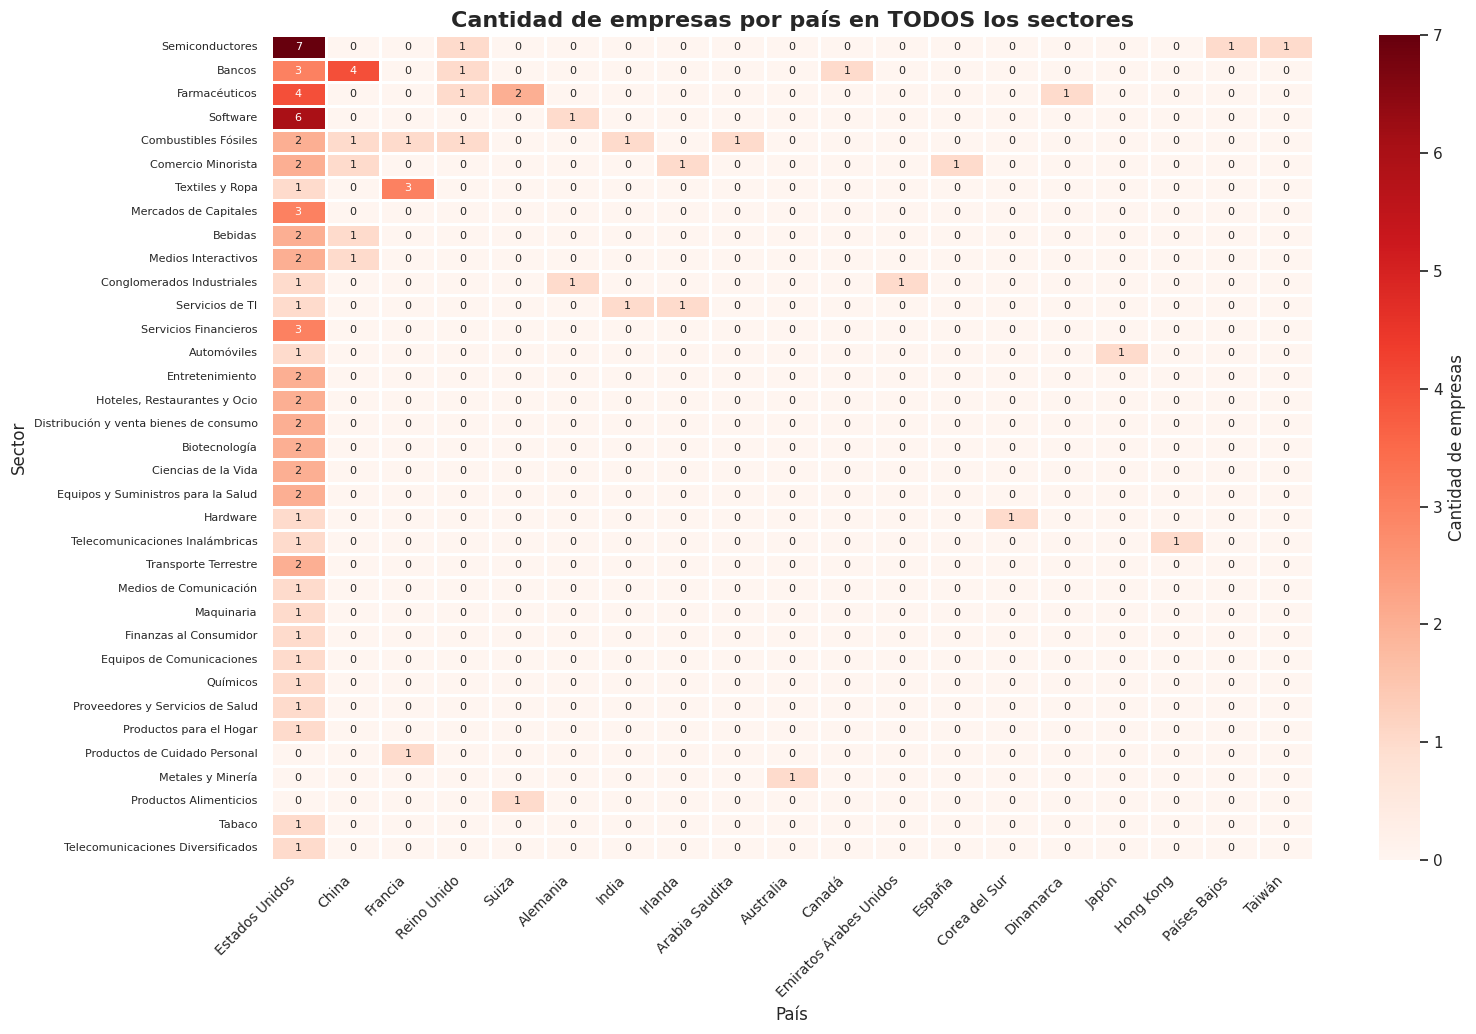

In [22]:
#----------------------------------------------------
# Análisis visual: distribución de empresas por país y sector (heatmap)
#----------------------------------------------------

# 1) Crear columna con sectores resumidos en todo el DataFrame
# Se agrupan los sectores originales en categorías más generales utilizando un diccionario de mapeo
df_empresas['Sector Resumido'] = df_empresas['Sector'].replace(sectores_resumidos)

# 2) Pivot table con TODOS los sectores
# Se crea una tabla dinámica donde:
# - Las filas representan sectores resumidos
# - Las columnas representan países
# - Los valores indican la cantidad de empresas por sector y país
# - Las celdas vacías se rellenan con 0
tabla_todos = df_empresas.pivot_table(
    index='Sector Resumido',
    columns='País',
    values='Empresa',
    aggfunc='count',
    fill_value=0
)

# 3) Ordenar filas (sectores) por total de empresas
# Se agrega una columna temporal 'Total' que suma las empresas por fila (por sector)
tabla_todos['Total'] = tabla_todos.sum(axis=1)

# Se ordena la tabla de forma descendente según el total y luego se elimina esa columna
tabla_todos = tabla_todos.sort_values('Total', ascending=False).drop(columns='Total')

# 4) (Opcional) también ordenar países por total de empresas
# Se calcula la suma por columna (por país), se ordena de mayor a menor y se reordenan las columnas según ese orden
col_order = tabla_todos.sum(axis=0).sort_values(ascending=False).index
tabla_todos = tabla_todos[col_order]

# 5) Dibujar heatmap para todos los sectores
# Se define el tamaño de la figura, ajustando la altura según el número de sectores
plt.figure(figsize=(16, max(6, 0.3 * tabla_todos.shape[0])))  # altura dinámica

# Se genera el mapa de calor con:
# - Anotaciones con los valores numéricos (annot=True, fmt='d')
# - Colores en escala roja (cmap="Reds")
# - Líneas blancas entre celdas para mejor visualización
# - Barra de color con etiqueta personalizada
sns.heatmap(
    tabla_todos,
    annot=True,
    fmt='d',
    cmap="Reds",
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de empresas'},
    annot_kws={"size": 8}
)

# Títulos y etiquetas del gráfico
plt.title('Cantidad de empresas por país en TODOS los sectores', fontsize=16, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Sector', fontsize=12)

# Ajustes de fuente y rotación en los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

# Ajuste final del diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()
